In [1]:
import pandas as pd
import numpy as np
# Check the note at the end


#Project Outline
1. Load the Data
2. Data Exploration
3. Feature Engineering
4. Model Training
5. Evaluation
6. Inferences and Suggestions

#Load the Data

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Fraud.csv')

# Data Exploration

In [6]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
#Checking dtype for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#Checking for null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**There are no missing values**

In [9]:
#Checking unique values in object data type
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
data['isFlaggedFraud'].unique()

array([0, 1])

In [11]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [82]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:
print("{:.2f}".format(8213/len(data)*100),'percentage cases are classified as fraud')

0.13 percentage cases are classified as fraud


**Data is heavily imbalanced. One of the following techniques should be used.**
1. Under_Sampling
2. Over_Sampling using SMOTE
3. Assigning Class weights to minority class

In [14]:
# examining what type of data isFlaggedFraud
data.iloc[np.where(data['isFlaggedFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


**All the flaggedFraud transactions are actually fraud.**

In [15]:
data.iloc[np.where((data['isFraud']== 1) & (data['newbalanceOrig']!= 0))]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.00,0.00,1,0
60853,9,TRANSFER,994453.20,C1121789613,1437370.87,442917.67,C254839817,194812.76,665743.67,1,0
377151,17,CASH_OUT,42062.82,C897869440,340830.43,298767.61,C616721459,398931.35,678419.64,1,0
481250,19,TRANSFER,10000000.00,C416779475,11861008.32,1861008.32,C380259496,0.00,0.00,1,0
586311,33,TRANSFER,10000000.00,C1439740840,19887819.06,9887819.06,C875288652,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.00,0.00,1,0
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.00,0.00,1,0
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0
6362582,741,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.00,0.00,1,0


**There are only 160 cases where the newbalanceOrig is not zero. For remaining cases the fraud agent transfers the whole amount.**

In [16]:
data.iloc[np.where(data['isFraud']== 1)]['type'].value_counts().to_numpy()

array([4116, 4097])

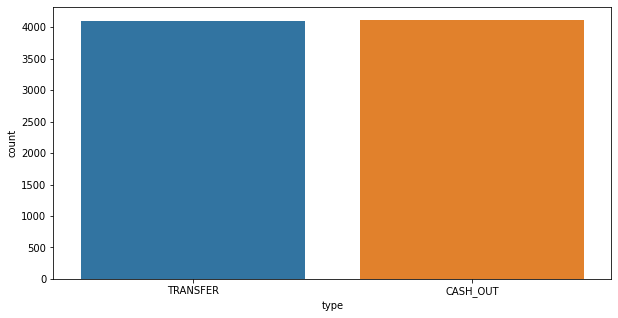

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.countplot(x ='type' ,data = data.iloc[np.where(data['isFraud']== 1)])
plt.show()

**Transaction type for Fraud Transactions is either 'Transfer' or 'Cash_out'**

In [18]:
data[data['nameOrig'].str.startswith("C")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


**All transactions are either between Customer to Customer or between Customer to Merchant**

In [19]:
data[data['nameDest'].str.startswith("M")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


There are 2151495 transactions between Customer and Merchant

In [20]:
data_m = data[data['nameDest'].str.startswith("M")]
data_m.loc[np.where(data_m['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [35]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Inference: There is not a single fraud transaction from Customer to Merchant**

#Feature Engineering

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


Add one column to signify whether nameDest is Customer or Merchant.No such column is needed for nameOrig since all the transactions are done by Customers

In [22]:
data_v2 = data.copy()

In [23]:
data_v2['nameDesttype'] = np.ones(len(data))

In [24]:
data_v2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDesttype
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1.0


In [25]:
#assign value 0 where nameDest is Merchant
data_v2['nameDesttype'].loc[data['nameDest'].str.startswith("M")] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
data_v2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDesttype
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0


In [27]:
#Dropping nameOrig and nameDest since they are irrelevant for training
final_data = data_v2.drop(['nameOrig','nameDest'],axis = 1)
final_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDesttype
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0


In [28]:
features = final_data.drop('isFraud',axis =1)
labels = final_data['isFraud']

In [29]:
features.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDesttype
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0.0


In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFlaggedFraud  int64  
 8   nameDesttype    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 436.9+ MB


In [31]:
features.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDesttype
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.003277,-0.004926
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.012295,0.197444
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.003835,0.189486
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,0.003776,0.193915
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.000513,0.231455
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,-0.000529,0.238315
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,1.000000,0.001133
nameDesttype,-0.004926,0.197444,0.189486,0.193915,0.231455,0.238315,0.001133,1.000000


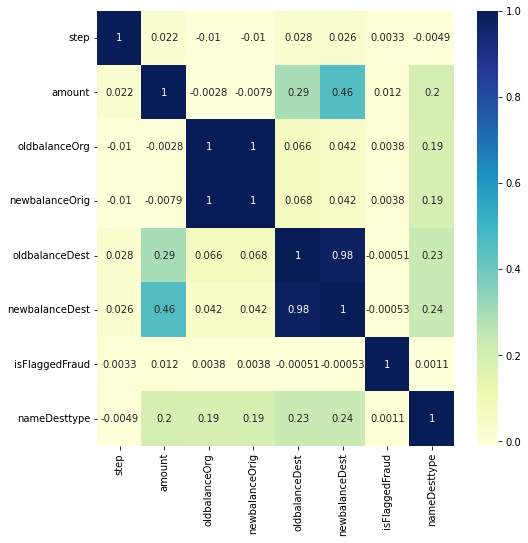

In [32]:
plt.figure(figsize = (8,8))
sns.heatmap(features.corr(),annot = True,cmap="YlGnBu")

Strong correlation is observed between
1. newbalanceOrig and oldbalanceOrig
2. newbalanceDest and oldbalanceDest

Drop one of the correlated features in each case


In [33]:
features.drop(['oldbalanceOrg','oldbalanceDest'],axis = 1,inplace  = True)

In [34]:
features

,step,type,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,nameDesttype
0,1,PAYMENT,9839.64,160296.36,0.00,0,0.0
1,1,PAYMENT,1864.28,19384.72,0.00,0,0.0
2,1,TRANSFER,181.00,0.00,0.00,0,1.0
3,1,CASH_OUT,181.00,0.00,0.00,0,1.0
4,1,PAYMENT,11668.14,29885.86,0.00,0,0.0
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,0,1.0
6362616,743,TRANSFER,6311409.28,0.00,0.00,0,1.0
6362617,743,CASH_OUT,6311409.28,0.00,6379898.11,0,1.0
6362618,743,TRANSFER,850002.52,0.00,0.00,0,1.0


#Model Training

##Splitting the data

In [42]:
from sklearn.model_selection import train_test_split
#splitting train_data into training data and validation data
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2, random_state = 92)

## Data preprocessing

In [43]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [44]:
col_cat = ['type']
col_num = ['amount','newbalanceOrig','newbalanceDest']

In [45]:
X_train

,step,type,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,nameDesttype
4994630,352,CASH_OUT,404659.24,0.00,911799.03,0,1.0
565175,23,PAYMENT,6104.21,327296.57,0.00,0,0.0
5174796,359,PAYMENT,51879.50,0.00,0.00,0,0.0
5560230,384,DEBIT,2038.10,199823.90,496313.20,0,1.0
6202808,584,TRANSFER,3921057.52,0.00,10748460.96,0,1.0
...,...,...,...,...,...,...,...
238278,14,PAYMENT,2201.89,0.00,0.00,0,0.0
3865483,283,CASH_IN,190523.03,5234278.74,811362.80,0,1.0
3414034,256,CASH_OUT,73739.26,263141.74,73739.26,0,1.0
6323011,688,CASH_IN,257646.67,1069139.72,716672.78,0,1.0


In [46]:
transformer = ColumnTransformer([('encoder',OneHotEncoder(), col_cat)
                                 
                                 ],remainder = 'passthrough')


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


In [47]:
X_train.shape

(5090096, 11)

In [48]:
# import imblearn
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
# rus = RandomUnderSampler(random_state = 0)
# smote = SMOTE()
# X_train,y_train = rus.fit_resample(X_train,y_train)

In [49]:
len(X_train)

5090096

## Fitting the model

Using Sampling methods dropped the f1-score so the techinque to assign class_weights was used.

In [50]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'exact')

In [51]:
# xgb.fit(X_train,y_train)

In [52]:
# xgb.score(X_test,y_test)

In [53]:
rd = RandomForestClassifier(random_state = 92,n_estimators = 200,class_weight = {0:1,1:10})
rd.fit(X_train,y_train)


RandomForestClassifier(class_weight={0: 1, 1: 10}, n_estimators=200,
                       random_state=92)

Training the model takes approximately 30 minutes.

In [54]:
rd.score(X_test,y_test)

0.9995229952440976

In [55]:
np.argmax(rd.feature_importances_)

8

In [58]:
y_pred = rd.predict(X_test)


In [59]:
y_test.value_counts()

0    1270826
1       1698
Name: isFraud, dtype: int64

# Evaluation 

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270826
           1       0.95      0.68      0.79      1698

    accuracy                           1.00   1272524
   macro avg       0.97      0.84      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



 ## **Monetary Impact of using  this model**

In [81]:
indx = np.where((y_test ==1) & (y_pred == 1))
indx0 = np.where(y_test == 1)
total_amount = np.sum(X_test[indx0][:,6])

right_prediction = np.sum(X_test[indx][:,6])

print("{0:.2f}".format(right_prediction/total_amount * 100), 'percent of money is saved if this model is used')
print("The company saved","{:0,.2f}".format(float(right_prediction)))


94.26 percent of money is saved if this model is used
The company saved 2,390,897,622.91


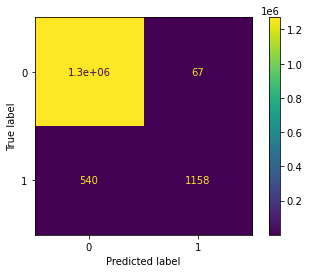

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

#NOTE:
Fitting the above model takes 30 minutes in CPU since the data is very large.\
A faster implementation is done here:
https://colab.research.google.com/drive/11Hp-dmzol58hNaYQIpgE6nInloo0tV9O?usp=sharing
using RAPIDS library which implements models on GPU(time taken for training was 30 seconds !!!)
Disclaimer: There is tradeoff between speed and accuracy.i.e the accuracy drops slightly.

# Inferences and Suggestions

Your task is to execute the process for proactive detection of fraud while answering following
questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
* There were no missing values in the dataset.Outliers were observed in 'amount' columns which is expected as transactions can vary from very low value to very high value.High collinearity was observed between 'newbalanceOrig' and 'oldbalanceOrig', 'newbalanceDest' and 'oldbalanceDest'. This due to fact after transaction the balance changes by a constant amount so strong linear relation is observed.

\

2. Describe your fraud detection model in elaboration.
* I have used random forest model for my predictions. Very high imbalance was observed in the data. So techniques like oversampling, undersampling and assigning class weights were used. Assigning class weights turned out to be the best performing technique.To evaluate the model f1 score metric was used.

\
3. How did you select variables to be included in the model?
* Intially all the nominal features like ids were removed since they are irrelevant for modelling but a new feature was added 'namedesttype' to retain the information whether the money was transferred to a merchant or a customer.After Observing correlation between features,one variable from each pair of highly correlated variables was removed.


\
4. Demonstrate the performance of the model by using best set of tools.
* To demonstrate the performance of the model Classification report and confusion matrix were used.The monetary impact has also been calculated which shows that after deploying the model bank can save **2,390,897,622**.

\
5. What are the key factors that predict fraudulent customer?
* Customers which cashed out all their money were more prone to be detected as fraudulent customer. Also after using the `features_importance_ `attribute the 'new balanceDist' is the most important feature.

\
6. Do these factors make sense? If yes, How? If not, How not?
* Yes, these factors do make sense since a fraud agent would always try to cash out the money out of the system as soon as possible.

\
7. What kind of prevention should be adopted while company update its infrastructure?
* Bank should keep checks on the transactions where the customer is trying to transfer the whole amount and should deploy two step authentication in these cases.Since it was observed in the data there were only 160 cases out of 8213 where fraud agent left some money in other cases the agent transferred all the money.
Banks should use a machine learning model like above and manually check all the transactions which are predicted as fraud.

\

8. Assuming these actions have been implemented, how would you determine if they work?
* Trendlines should be created to check whether the no. of frauds are increasing or decreasing.Something like a real time model should be used 